In [ ]:
import pandas as pd  
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df   = pd.read_csv('kmeans10.csv')
df = df[df['BUTTER_ITEMS']>0]
print(df.shape)
##df = df[df['POPCORN_ITEMS']>0]
print(df.shape)

(5346, 25)
(5346, 25)


In [ ]:
df['BUTTER_CONCESSION'] = (df['BUTTER_ITEMS'] / df['CONCESSION_ITEMS']).fillna(0).replace(np.inf, 0)

In [ ]:
df.head()

,Unnamed: 0,Visit_ID,TICKETS,FAMILY_TICKETS,FLAG_FAMILY,CONCESSION_ITEMS,ONTARIO,QUEBEC,ATLANTIC,PRARIES,BC,BUTTER_ITEMS,POPCORN_FLAG,BUTTER_FLAG,POPCORN_ITEMS,PNT_REDEEMED,PNT_EARNED,BUTTER_TO_POPCORN_RATIO,PREMIUM,EARLY_EVENING,LATE_EVENING,OVERNIGHT,EARLY_MATINEE,LATE_MATINEE,EVENING_NIGHT,BUTTER_CONCESSION
1,1,4,2,0,0,2,1,0,0,0,0,1.0,1,1,1.0,0,235,1.0,1,0,0,0,1,0,0,0.500000
12,12,23,3,3,1,7,1,0,0,0,0,2.0,1,1,1.0,0,397,2.0,0,0,1,0,0,0,1,0.285714
33,33,62,1,1,1,3,1,0,0,0,0,1.0,1,1,1.0,0,222,1.0,0,0,0,0,1,0,0,0.333333
36,36,71,1,0,0,7,0,0,0,1,0,2.0,1,1,1.0,0,347,2.0,0,0,1,0,0,0,1,0.285714
39,39,74,2,0,0,6,1,0,0,0,0,4.0,1,1,1.0,0,302,4.0,0,0,0,0,1,0,0,0.666667


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df_Kmeans = df[['ATLANTIC','PREMIUM','PNT_REDEEMED','EVENING_NIGHT']] 
values = df_Kmeans.values.astype(float) 
#was good
#'PREMIUM','CONCESSION_ITEMS','BUTTER_TO_POPCORN_RATIO','PNT_REDEEMED','EVENING_NIGHT','FAMILY_TICKETS'

##standardize
min_max_scaler = preprocessing.MinMaxScaler()
values_scaled = min_max_scaler.fit_transform(values) 
df2 = pd.DataFrame(values_scaled)
df2.columns = ['ATLANTIC','PREMIUM','PNT_REDEEMED','EVENING_NIGHT'] 

In [ ]:
#not used for final
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1))
sel.fit(df2)
sel.get_support()

array([False,  True, False,  True])

In [ ]:
#PCA - not used for current implementation
#from sklearn.decomposition import PCA
#l = len(df2.columns)
# Create a PCA instance: pca
#pca = PCA(n_components=l)
#principalComponents = pca.fit_transform(df2)
#features = range(pca.n_components_)
#plt.bar(features, pca.explained_variance_ratio_, color='black')
#plt.xlabel('PCA features')
#plt.ylabel('variance %')
#plt.xticks(features)

In [ ]:
#choose the right  number of clusters
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]
nclusters = []
sil_score = []

for n_clusters in range_n_clusters:
  
    clusterer = KMeans(n_clusters=n_clusters) #,random_state=10)
    cluster_labels = clusterer.fit_predict(df2)
    silhouette = silhouette_score(df2, cluster_labels, metric='euclidean')
    
    nclusters.append(n_clusters)
    sil_score.append(silhouette)
    
output = list(zip(nclusters,sil_score))
choice = pd.DataFrame(list(output)) 
choice.columns = ['number of clusters','silhouette score']
print( tabulate(choice, choice.columns) )

      number of clusters    silhouette score
--  --------------------  ------------------
 0                     2            0.654393
 1                     3            0.817814
 2                     4            0.904985
 3                     5            0.924406
 4                     6            0.932624
 5                     7            0.876309
 6                     8            0.863665


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f648c02fba8>,
                     model=None)

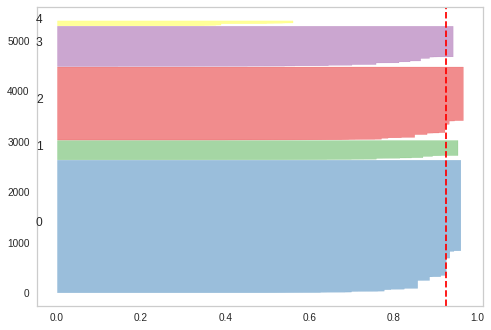

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df2)        # Fit the data to the visualizer

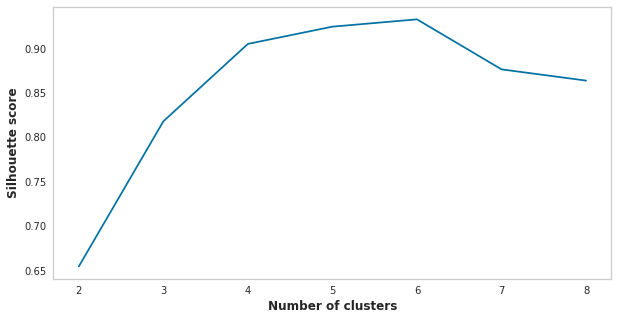

In [ ]:
#plot scores in case want to choose a different cluster than what is suggested for business reasons
plt.figure(figsize=(10,5))
plt.plot(choice['number of clusters'], choice['silhouette score'])
plt.rcParams["font.family"] = "cursive"

plt.xlabel ('Number of clusters',fontsize=12,fontweight='bold')
plt.ylabel ('Silhouette score',fontsize=12,fontweight='bold')
plt.show()

In [ ]:

##choose number of clusters based on above results
max_score = choice['silhouette score'].max()
n_clusters =  choice[choice['silhouette score'] == max_score]['number of clusters'].max()
#or choose n_clusters yourself -> n_clusters = 5
clusterer = KMeans(n_clusters=5).fit(df2) 

##getting cluster labels
labels = clusterer.labels_

C = clusterer.cluster_centers_
print(n_clusters, "clusters:")
print(C)

6 clusters:
[[ 2.22044605e-16 -2.88657986e-15  4.12129791e-02  1.00000000e+00]
 [ 2.01227923e-16 -2.74780199e-15  3.51651200e-02  2.34257058e-14]
 [ 3.76411543e-03  1.00000000e+00  5.56663381e-02  1.00000000e+00]
 [ 2.62467192e-03  1.00000000e+00  4.51349831e-02 -2.22044605e-15]
 [ 1.00000000e+00  3.33066907e-16  4.03166421e-02  5.87628866e-01]]


In [ ]:
df_final = df_Kmeans
df_final['clusters'] = labels

for col in df_final:
  print(col)
  print(df_final[(col)].groupby(df_final['clusters']).agg(['count','mean','min','max','sum']))
  print('\n')

ATLANTIC
          count      mean  min  max  sum
clusters                                
0          2624  0.000000    0    0    0
1          1447  0.000000    0    0    0
2           797  0.003764    0    1    3
3           381  0.002625    0    1    1
4            97  1.000000    1    1   97


PREMIUM
          count  mean  min  max  sum
clusters                            
0          2624     0    0    0    0
1          1447     0    0    0    0
2           797     1    1    1  797
3           381     1    1    1  381
4            97     0    0    0    0


PNT_REDEEMED
          count        mean  min    max      sum
clusters                                        
0          2624  576.981707    0   8750  1514000
1          1447  492.311679    0  11250   712375
2           797  779.328733    0  14000   621125
3           381  631.889764    0   8000   240750
4            97  564.432990    0   6000    54750


EVENING_NIGHT
          count      mean  min  max   sum
clusters           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from google.colab import files
df_final.to_csv('df_final.csv') 
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>